In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [4]:
#downloading and demonstration of the credits dataset
crd = pd.read_csv("/Users/adinamazova/Downloads/archive/tmdb_5000_credits.csv")
crd.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [5]:
crd.shape #info about rows and columns of the credits dataset

(4803, 4)

In [6]:
crd.info()
crd.isnull().sum() #summing null fields, if isnull is true

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [7]:
#downloading and demonstration of the movie dataset
mov = pd.read_csv("/Users/adinamazova/Downloads/archive/tmdb_5000_movies.csv")
mov.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
mov.shape #info about rows and columns of the movies dataset

(4803, 20)

In [9]:
mov.info()
mov.isnull().sum() #summing null fields, if isnull is true in the movies dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
#connecting movies and credits datasets by their id's
crd.columns = ['id', 'title', 'cast', 'crew']
mov = mov.merge(crd, on = 'id')

In [11]:
#demonstration of the combined version of datasets
crd.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
#calculating actual weighted score of movies => 
#mean of average votes 
mean_vote = mov['vote_average'].mean()
mean_vote

6.092171559442011

In [16]:
#minimum votes
min_votes = mov['vote_count'].quantile(0.9)
min_votes

1838.4000000000015

In [17]:
#movies with highest votes
movies = mov.copy().loc[mov['vote_count'] >= min_votes]
movies.shape

(481, 23)

In [18]:
#IMDb does not reveal real calculation formula => 
#formula from https://www.quora.com/How-does-IMDbs-rating-system-work will be used
def w_score(x, mean_vote = mean_vote, min_votes = min_votes):
    amount_votes = x['vote_count']
    avg_votes = x['vote_average']
    return (amount_votes/(amount_votes + min_votes)*avg_votes) + (min_votes/(min_votes + amount_votes)*mean_vote)

In [19]:
#creation of 'score' of movies based on their actual weighted score
movies['score'] = movies.apply(w_score, axis = 1)
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [21]:
#demonstration of TOP 15 movies with the highest scores
movies = movies.sort_values('score', ascending = False)
movies[['title_x', 'vote_count', 'vote_average', 'score']].head(15)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Top 15 Popular Movies')

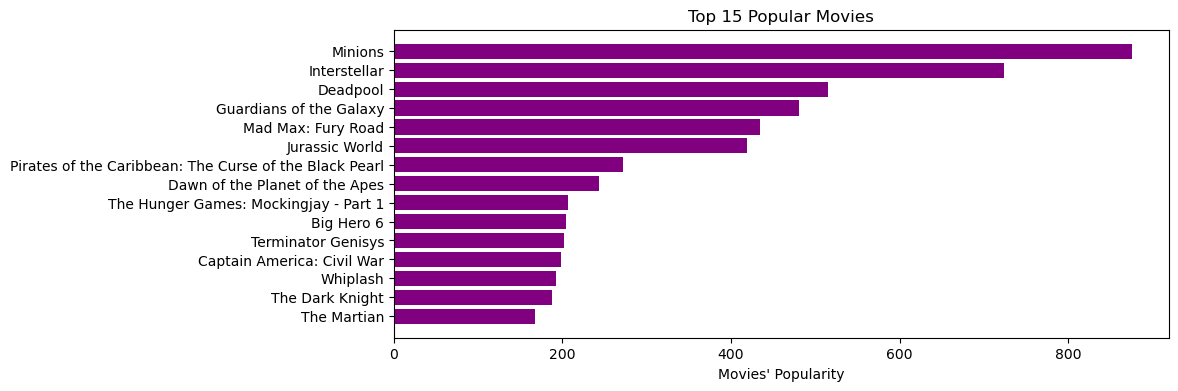

In [23]:
#demonstration of TOP 15 popular movies
movies_popularity = mov.sort_values('popularity', ascending = False)

plt.figure(figsize = (10, 4))

plt.barh(movies_popularity['title_x'].head(15), movies_popularity['popularity'].head(15), align = 'center', color = 'purple')
plt.gca().invert_yaxis()
plt.xlabel("Movies' Popularity")
plt.title("Top 15 Popular Movies")

Text(0.5, 1.0, 'Top 15 Movies with High Budget')

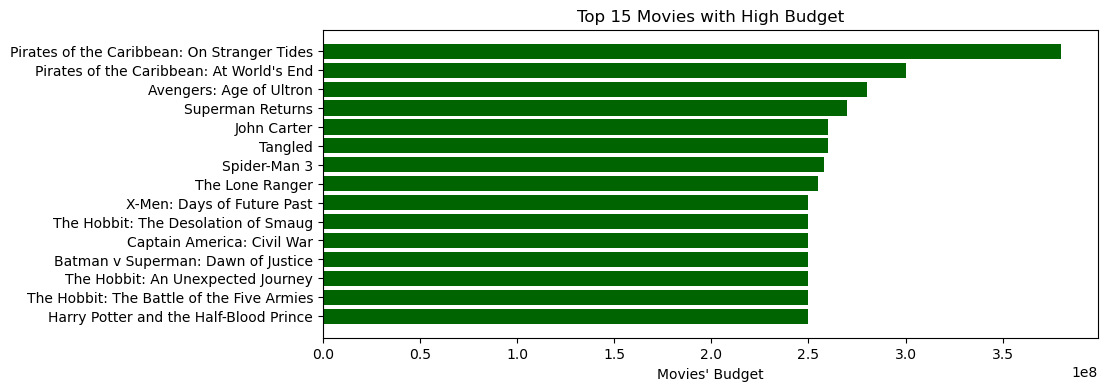

In [24]:
#demonstration of TOP 15 movies with the highest budget
movies_budget = mov.sort_values('budget', ascending = False)

plt.figure(figsize = (10, 4))

plt.barh(movies_budget['title_x'].head(15), movies_budget['budget'].head(15), align = 'center', color = 'darkgreen')
plt.gca().invert_yaxis()
plt.xlabel("Movies' Budget")
plt.title("Top 15 Movies with High Budget")

In [25]:
mov['overview'].head(15)

0     In the 22nd century, a paraplegic Marine is di...
1     Captain Barbossa, long believed to be dead, ha...
2     A cryptic message from Bond’s past sends him o...
3     Following the death of District Attorney Harve...
4     John Carter is a war-weary, former military ca...
5     The seemingly invincible Spider-Man goes up ag...
6     When the kingdom's most wanted-and most charmi...
7     When Tony Stark tries to jumpstart a dormant p...
8     As Harry begins his sixth year at Hogwarts, he...
9     Fearing the actions of a god-like Super Hero l...
10    Superman returns to discover his 5-year absenc...
11    Quantum of Solace continues the adventures of ...
12    Captain Jack Sparrow works his way out of a bl...
13    The Texas Rangers chase down a gang of outlaws...
14    A young boy learns that he has extraordinary p...
Name: overview, dtype: object

In [27]:
tfidf = TfidfVectorizer(stop_words = 'english') #eliminating meaningless words

mov['overview'] = mov['overview'].fillna('') #NaN => empty space

tfidf_matrix = tfidf.fit_transform(mov['overview']) #fiting and transfroming data => matrix creation

tfidf_matrix.shape

(4803, 20978)

In [28]:
#cosine similarity matrix
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
#finding index of a film and dropping duplicates
indices = pd.Series(mov.index, index = mov['title_x']).drop_duplicates()

In [33]:
recommend('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
942                 The Book of Life
1033                        Insomnia
2767                   Birthday Girl
570                           Ransom
1213     Aliens vs Predator: Requiem
Name: title_x, dtype: object

In [ ]:
#function for finding 15 films with similar overview to chosen one
def recommend(title, cos_similarity = cos_similarity):
    ind = indices[title]
    similar_scores = list(enumerate(cos_similarity[ind]))
    similar_scores = sorted(similar_scores, key = lambda x: x[1], reverse = True)
    similar_scores = similar_scores[1:16]
    movie_ind = [i[0] for i in similar_scores]
    return mov['title_x'].iloc[movie_ind]

In [34]:
#expanding search of similar movies to genre, keywords, cast and crew
from ast import literal_eval
features = ['genres', 'keywords', 'cast', 'crew']
for feat in features:
    mov[feat] = mov[feat].apply(literal_eval)

In [39]:
#getting director name; if no director => NaN
def dirc(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [40]:
#finding top list of top 5 movies or all movies
def top_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 5: #top 5/all movies
            names = names[:5]
        return names
    return [] #empty list, if there is no data

In [42]:
#new features
mov['director'] = mov['crew'].apply(dirc) 

features = ['genres', 'keywords', 'cast']
for feat in features:
    mov[feat] = mov[feat].apply(top_list)

TypeError: string indices must be integers

In [43]:
#new features
mov[['title_x', 'cast', 'director', 'genres', 'keywords']].head(5)

,title_x,cast,director,genres,keywords
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i..."
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel..."


In [44]:
# making all letters lower case, eliminating spces from names 
def repl(x):
    if isinstance(x, list):
        return[str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str): 
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [45]:
features = ['cast', 'director', 'genres', 'keywords']
for feat in features:
    mov[feat] = mov[feat].apply(repl)

In [50]:
#collecting all values of all features
def fillin(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
mov['result'] = mov.apply(fillin, axis = 1)

In [51]:
count = CountVectorizer(stop_words = 'english')
count_mtx = count.fit_transform(mov['result'])

In [54]:
#calculating cos similarity matrix
cos_similarity0 = cosine_similarity(count_mtx, count_mtx)

In [55]:
#discharging index and completing reverse mapping 
mov = mov.reset_index()
indices = pd.Series(mov.index, index = mov['title_x'])

In [56]:
recommend('Avatar', cos_similarity0)

322                       The Fifth Element
466                        The Time Machine
1932                                 Sheena
4401                    The Helix... Loaded
56                         Star Trek Beyond
47                  Star Trek Into Darkness
94                  Guardians of the Galaxy
206                     Clash of the Titans
1939                             BloodRayne
3208        Star Wars: Clone Wars: Volume 1
10                         Superman Returns
14                             Man of Steel
46               X-Men: Days of Future Past
61                        Jupiter Ascending
85      Captain America: The Winter Soldier
Name: title_x, dtype: object